In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # -----------------------------
# # Data (from your table)
# # -----------------------------
# # KEYS HERE MUST MATCH the values in 'areas'
# data = {
#     "Open Source (Pareto Frontier)": {
#         "GPQA-D": {"factor": 5.403, "ci": (2.279, 12.811)},
#         "AIME":   {"factor": 8.160, "ci": (2.490, 26.745)},
#         "SWE-V":  {"factor": None,  "ci": None},  # not available in table
#     },
#     "All License (Pareto Frontier)": {
#         "GPQA-D": {"factor": 10.988, "ci": (3.982, 30.376)},
#         "AIME":   {"factor": 22.424, "ci": (7.093, 70.894)},
#         "SWE-V":  {"factor": 1.507,  "ci": (0.205, 11.087)},
#     }
# }

# # Order inside each region (left -> right)
# benchmarks = ["GPQA-D", "AIME", "SWE-V"]
# areas = ["Open Source (Pareto Frontier)", "All License (Pareto Frontier)"]

# # Consistent colors per benchmark
# colors = {
#     "GPQA-D": "#1f77b4",  # blue
#     "AIME":   "#ff7f0e",  # orange
#     "SWE-V":  "#2ca02c",  # green
# }

# markers = {"GPQA-D": "o", "AIME": "D", "SWE-V": "s"}

# # -----------------------------
# # Layout: two regions close together
# # -----------------------------
# group_gap = 1.0     # smaller gap to bring regions closer
# within_gap = 0.25   # compact spacing inside each region

# area_positions = [0.0, 0.0 + group_gap]
# offsets = {
#     "GPQA-D": -within_gap,
#     "AIME":    0.0,
#     "SWE-V":  +within_gap,
# }

# # -----------------------------
# # Collect range for sensible log y-lims
# # -----------------------------
# vals = []
# for area in areas:
#     for b in benchmarks:
#         # Defensive: Only access if keys exist, to prevent KeyError
#         if area in data and b in data[area]:
#             e = data[area][b]
#             if e["factor"] is not None:
#                 f = e["factor"]; lo, hi = e["ci"]
#                 vals += [lo, f, hi]
# if not vals:
#     vals = [1e-2, 1e2]

# ymin = max(min(vals) * 0.8, 1e-6)
# ymax = max(vals) * 1.25

# # -----------------------------
# # Plot
# # -----------------------------
# fig, ax = plt.subplots(figsize=(7.2, 4.8))

# for i, area in enumerate(areas):
#     base_x = area_positions[i]
#     for b in benchmarks:
#         x = base_x + offsets[b]
#         if area not in data or b not in data[area]:
#             ax.text(x, ymin*1.1, "N/A", ha="center", va="bottom", rotation=90, fontsize=8)
#             continue
#         e = data[area][b]
#         if e["factor"] is None or e["ci"] is None:
#             ax.text(x, ymin*1.1, "no data", ha="center", va="bottom", rotation=90, fontsize=8)
#             continue

#         factor = e["factor"]
#         lo, hi = e["ci"]
#         yerr = np.array([[max(factor - lo, 0)], [max(hi - factor, 0)]])

#         ax.errorbar(
#             x, factor,
#             yerr=yerr,
#             fmt=markers[b],
#             capsize=4,
#             elinewidth=1.2,
#             linewidth=0,
#             color=colors[b],
#             markerfacecolor=colors[b],
#             markeredgecolor=colors[b],
#             label=b,  # will deduplicate
#             zorder=3
#         )

# # Axes + formatting
# ax.set_yscale("log")
# ax.set_ylim(ymin, ymax)

# ax.set_xticks(area_positions)
# ax.set_xticklabels(areas, fontsize=14)  # make x tick labels larger

# # Y ticks: increase font size
# for label in ax.get_yticklabels():
#     label.set_fontsize(14)

# ax.set_ylabel("Annual Reduction Factor (log scale)", fontsize=16)  # make y axis label larger
# ax.set_title("Factor Change with 90% CI by Benchmark", pad=10, fontsize=16)

# # Reference line at 1
# ax.axhline(1.0, linestyle="--", linewidth=1.0, alpha=0.7, zorder=1)

# # Tight x-lims around groups so there's no big middle gap
# pad = within_gap * 1.6
# ax.set_xlim(area_positions[0] - pad, area_positions[-1] + pad)

# # Move legend out of the plot (no middle overlay)
# handles, labels = ax.get_legend_handles_labels()
# uniq = dict(zip(labels, handles))
# ax.legend(
#     uniq.values(),
#     uniq.keys(),
#     title="Benchmark",
#     frameon=False,
#     loc="upper center",
#     bbox_to_anchor=(0.5, -0.12),
#     ncol=3,
# )

# fig.tight_layout()
# plt.grid(True)

# # Save the figure
# fig.savefig("figures/growth_rates.png", dpi=150)

# plt.show()


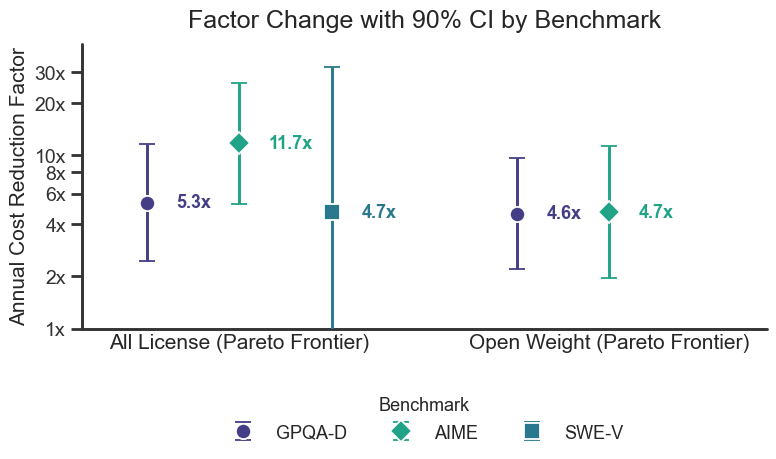

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colormaps

# Use seaborn white theme for modern look
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2, rc={"axes.titlesize": 18, "axes.labelsize": 15})

# -----------------------------
# Data (from your table)
# -----------------------------
data = {
    "Open Weight (Pareto Frontier)": {
        "GPQA-D": {"factor": 4.602, "ci": (2.195, 9.648)},
        "AIME": {"factor": 4.680, "ci": (1.943, 11.273)},
        "SWE-V": {"factor": None, "ci": None},  # CI is nan
    },
    "All License (Pareto Frontier)": {
        "GPQA-D": {"factor": 5.315, "ci": (2.449, 11.534)},
        "AIME": {"factor": 11.664, "ci": (5.250, 25.911)},
        "SWE-V": {"factor": 4.675, "ci": (0.680, 32.156)},
    }
}

benchmarks = ["GPQA-D", "AIME", "SWE-V"]
areas = ["All License (Pareto Frontier)", "Open Weight (Pareto Frontier)"]

# Viridis color map (with mid/greenish yellow for better visibility)
viridis = colormaps['viridis']
color_indices = [0.18, 0.58, 0.40]  # blue, greener-yellow, green
colors = {
    b: viridis(color_indices[i]) for i, b in enumerate(benchmarks)
}
markers = {"GPQA-D": "o", "AIME": "D", "SWE-V": "s"}

# Layout: two regions close together
group_gap = 1.0
within_gap = 0.25
area_positions = [0.0, group_gap]
offsets = {
    "GPQA-D": -within_gap,
    "AIME":    0.0,
    "SWE-V":  +within_gap,
}

# Y-axis limits
vals = []
for area in areas:
    for b in benchmarks:
        if area in data and b in data[area]:
            e = data[area][b]
            if e["factor"] is not None:
                f = e["factor"]; lo, hi = e["ci"]
                vals += [lo, f, hi]
if not vals:
    vals = [1e-2, 1e2]
ymin = 1.0
ymax = max(vals) * 1.36

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

for i, area in enumerate(areas):
    base_x = area_positions[i]
    for b in benchmarks:
        x = base_x + offsets[b]
        if area not in data or b not in data[area]:
            ax.text(x, ymin*1.15, "N/A", ha="center", va="bottom", rotation=90, fontsize=10, color='#888')
            continue
        e = data[area][b]
        if e["factor"] is None or e["ci"] is None:
            # don't remove this when I comment it out I might want it later
            # ax.text(x, ymin*1.15, "no data", ha="center", va="bottom", rotation=90, fontsize=20, color='#888')
            continue
        factor = e["factor"]
        lo, hi = e["ci"]
        yerr = np.array([[max(factor - lo, 0)], [max(hi - factor, 0)]])
        ax.errorbar(
            x, factor,
            yerr=yerr,
            fmt=markers[b],
            capsize=6,
            elinewidth=2.1,
            linewidth=0,
            color=colors[b],
            markerfacecolor=colors[b],
            markeredgecolor='white',
            markeredgewidth=1.3,
            markersize=11,
            label=b,
            zorder=3
        )
        
        # Add text label next to each point showing the factor
        ax.text(x + 0.08, factor, f'{factor:.1f}x', 
                ha='left', va='center', fontsize=13, 
                color=colors[b], fontweight='bold')

# Axes formatting and styling
ax.set_yscale("log")
ax.set_ylim(ymin, ymax)
ax.set_xticks(area_positions)
ax.set_xticklabels(areas, fontsize=15)
ax.set_ylabel("Annual Cost Reduction Factor")
ax.set_title("Factor Change with 90% CI by Benchmark", pad=12)

# Set custom y-axis ticks including 1x
ax.set_yticks([1, 2, 4, 6, 8, 10, 20, 30])
ax.set_yticklabels(['1x', '2x', '4x', '6x', '8x', '10x', '20x', '30x'])
for label in ax.get_yticklabels():
    label.set_fontsize(14)

# Tight xlims with padding
pad = within_gap * 1.7
ax.set_xlim(area_positions[0] - pad, area_positions[-1] + pad)

# Legend deduplication
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels, handles))
ax.legend(
    uniq.values(),
    uniq.keys(),
    title="Benchmark",
    frameon=False,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.17),
    ncol=len(benchmarks),
    fancybox=True,
    fontsize=13,
    title_fontsize=13,
    borderaxespad=0.7
)

# Outline the axes: make the left and bottom spines visible and bold, hide the rest
for spine_name, spine in ax.spines.items():
    if spine_name in ("left", "bottom"):
        spine.set_visible(True)
        spine.set_linewidth(2.1)
        spine.set_color("#333")
        spine.set_capstyle('round')
    else:
        spine.set_visible(False)

# No grid lines
ax.grid(False)

# Add horizontal tick marks on y-axis at each tick level
ax.tick_params(axis='y', which='major', length=8, width=2, direction='out', colors='#333', left=True)
ax.tick_params(axis='x', which='major', length=0)

ax.set_axisbelow(True)
fig.tight_layout()
fig.savefig("figures/growth_rates.png", dpi=150, bbox_inches="tight")
plt.show()
